In [2]:
from ThinFilmClasses import ThinFilmLayer, ThinFilmSystem
from DataProcessing import process_data, data_smoothing, plot_reflectance, plot_nk, extract_layer_thicknesses
from Optimization import optimize_nk
import numpy as np

In [3]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
# path = r'C:\Users\hongr\Box\MURI-SARA\Code\Sample_Refl_Scan\1.csv'
path1 = r'test_data\spectra\+02_+05.csv'
data1, left, right = process_data(path1)
thickness1 = extract_layer_thicknesses(path1)

# 2. Create multilayer system
n_points1 = 10 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("igzo_111", thickness1[0], n_points1, left, right)
layer2 = ThinFilmLayer("sio2", thickness1[1], 0, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer1 = ThinFilmSystem([air, layer1, layer2, substrate])
R1, _, _ = multilayer1.calculate_RTA(data1['wavelength'])

# 3. Optimization (The most time-consuming step!)
optimal_data1, optimized_params1 = optimize_nk(multilayer1, layer_index=1, data=data1, n_points=n_points1, weight_n=1, weight_k=10e4, weight_second_diff_n=100, weight_second_diff_k=10e4, smooth=False)

left =  379.301939
right =  830.503237

Captured lines:
"#   0 ""b-Ga2O3"" 112.578456 0.000000 200.000000 1"
"#   1 ""SiO2"" 21.490979 0.000000 40.000000 0"
nk data found for air.
nk data found for igzo_111.
nk data found for sio2.
nk data found for c-Si.
Initial n of layer1 is: [2.18891476 2.14453087 2.11283457 2.09244203 2.07303521 2.05627328
 2.04175943 2.03052791 2.01868929 2.00816669]
Initial k of layer1 is: [0.01513064 0.00362531 0.00203728 0.         0.         0.
 0.00062422 0.00080921 0.00105252 0.00020019]
Optimal n:  [2.19537539 2.12444482 2.0555919  1.99849551 1.96567501 1.94454023
 1.92340372 1.90855733 1.89938947 1.92108589]
Optimal k:  [0.03384076 0.03425193 0.03476686 0.03520888 0.03545459 0.03559774
 0.03561015 0.03563572 0.03561263 0.03559676]
Optimal Thickness:  110.16683849490212


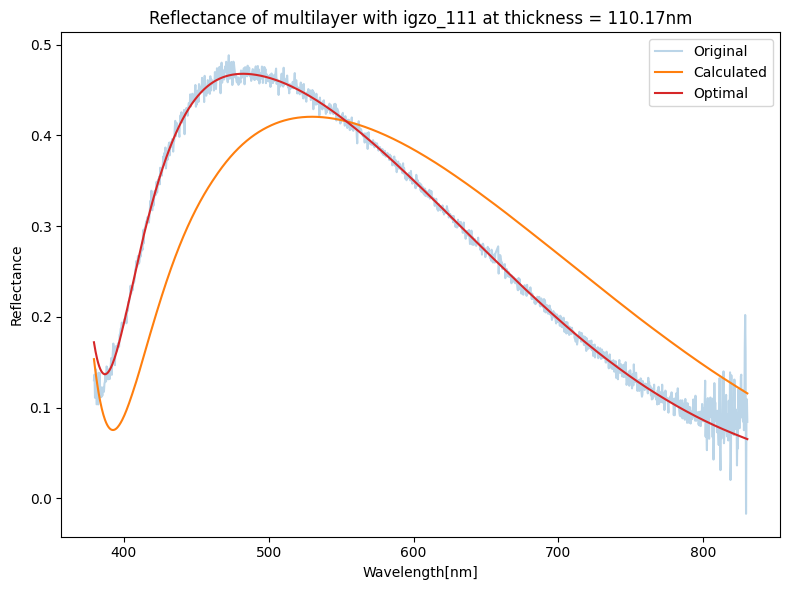

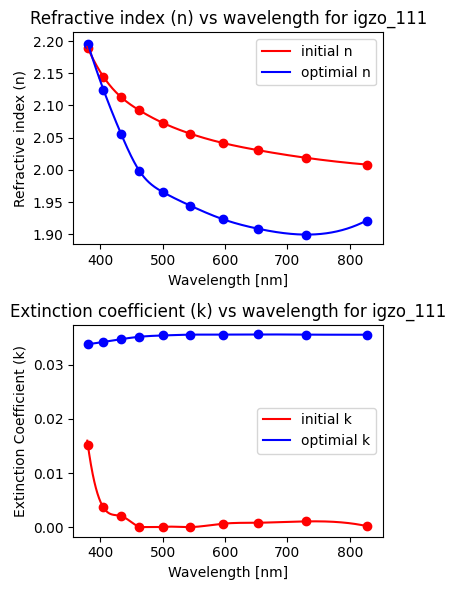

In [4]:
# 4. Plot the reflectance
plot_reflectance(data1, smooth=False, multilayer=multilayer1, layer_index=1, calculated_data=R1, optimal_data=optimal_data1)
plot_nk(data1, optimized_params1, n_points1, multilayer1, layer_index=1)

In [4]:
# 1. Provide the path of the data, lower bound of the wavelength (left), and upper bound of the wavelength (right).
path2 = r"test_data\sio2_reflectance_test.csv"
data2, left, right = process_data(path2)
thickness2 = extract_layer_thicknesses(path2)

# 2. Create multilayer system
n_points2 = 10 # Number of points used to fit the n_spline and k_spline
air = ThinFilmLayer("air", 1, 0, left, right)
layer1 = ThinFilmLayer("sio2", thickness2[0], n_points2, left, right)
substrate = ThinFilmLayer("c-Si", 1, 0, left, right)

multilayer2 = ThinFilmSystem([air, layer1, substrate])
R2, _, _ = multilayer2.calculate_RTA(data2['wavelength'])

# 3. Optimization (The most time-consuming step!)
optimal_data2, optimized_params2 = optimize_nk(multilayer2, layer_index=1, data=data2, n_points=n_points2, weight_n=100, weight_k=10e4, weight_second_diff_n=100, weight_second_diff_k=10e6, smooth=False)

Index 0: # FilmMeasure spectrum v1.0
Index 1: # Timestamp: 1691795175 Fri Aug 11 19:06:15 2023
Index 2: # NPT: 2048
Index 3: # REFERENCE STACK
Index 4: #   substrate "Si"
Index 5: # END
Resetting capturing due to premature END
Index 6: # SAMPLE STACK
Start capturing
Index 7: #   0 "SiO2" 514.915887 0.000000 1000.000000 1
Index 8: #   substrate "Si"
End capturing at substrate

Captured lines:
#   0 "SiO2" 514.915887 0.000000 1000.000000 1
nk data found for air.
nk data found for sio2.
nk data found for c-Si.
Initial n of layer1 is: [1.5114 1.5006 1.4913 1.4832 1.4762 1.4701 1.4649 1.4604 1.4565 1.4529]
Initial k of layer1 is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal n:  [1.51243177 1.50422139 1.49465705 1.48577507 1.47936909 1.47109101
 1.46532072 1.46063159 1.45690248 1.45275989]
Optimal k:  [2.50087080e-04 3.62051600e-04 4.23677821e-04 4.05764196e-04
 3.28682116e-04 2.41232057e-04 1.50380793e-04 6.45099967e-05
 3.14525268e-05 1.73822956e-05]
Optimal Thickness:  514.9290314764851


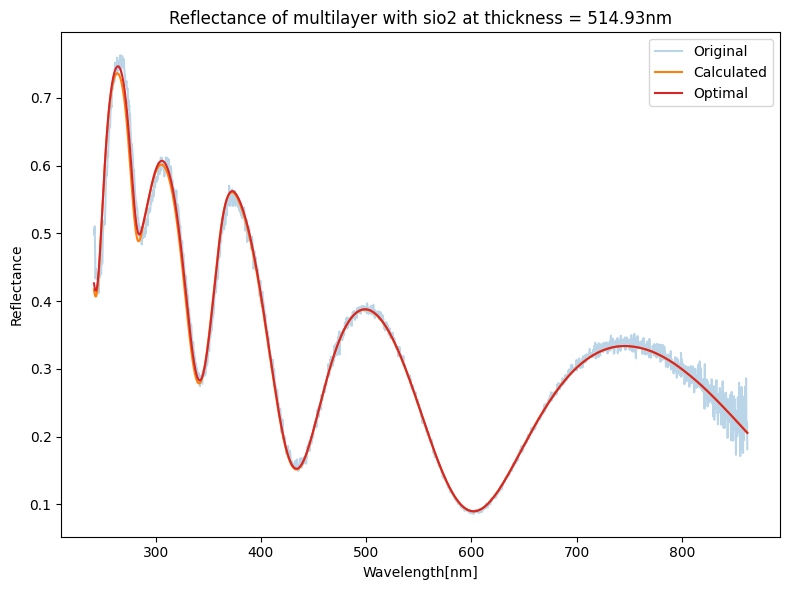

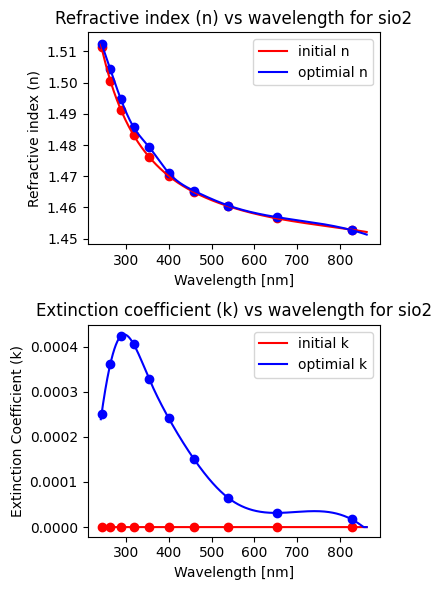

In [5]:
# 4. Plot the reflectance
plot_reflectance(data2, smooth=False, multilayer=multilayer2, layer_index=1, calculated_data=R2, optimal_data=optimal_data2)
plot_nk(data2, optimized_params2, n_points2, multilayer2, layer_index=1)